In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from feature_engine.outliers import Winsorizer

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,  LabelEncoder
from feature_engine.encoding import OrdinalEncoder, RareLabelEncoder
from category_encoders import HashingEncoder


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, confusion_matrix, f1_score



In [244]:
train = pd.read_csv('train.csv')

In [245]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [246]:
train.shape

(891, 12)

In [247]:
test = pd.read_csv('test.csv')

In [248]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [249]:
test.shape

(418, 11)

In [250]:
sample = pd.read_csv('gender_submission.csv')

In [251]:
sample.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [252]:
sample.shape

(418, 2)

In [253]:
train1 = train.drop('Survived', axis = 1)

In [254]:
train2 = pd.concat([train1, test]).reset_index()
train2.drop(['index'],axis=1,inplace=True)

train2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [255]:
train2.shape

(1309, 11)

In [256]:
train2.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [257]:
train2.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [258]:
train2.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [259]:
print('number of unique values')
print()
for feature in train2.columns :
    print(feature, train2[feature].nunique())

number of unique values

PassengerId 1309
Pclass 3
Name 1307
Sex 2
Age 98
SibSp 7
Parch 8
Ticket 929
Fare 281
Cabin 186
Embarked 3


In [260]:
print('number of null values')
print()
for feature in train2.columns :
    print(feature, train2[feature].isnull().sum())

number of null values

PassengerId 0
Pclass 0
Name 0
Sex 0
Age 263
SibSp 0
Parch 0
Ticket 0
Fare 1
Cabin 1014
Embarked 2


In [261]:
numerical = [feature for feature in train2.columns if train2[feature].dtypes != 'O']
train2[numerical].head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [262]:
categorical = [feature for feature in train2.columns if train2[feature].dtypes == 'O']
train2[categorical].head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [263]:
train2.drop_duplicates(keep = 'first',inplace=True)
print(train2.shape)

(1309, 11)


In [264]:
train2.drop(['PassengerId', 'Name'], axis = 1, inplace = True)

In [265]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [266]:
cat_nan = [feature for feature in train2.columns if train2[feature].isnull().sum()>=0 and train2[feature].dtypes == 'O']
for feature in cat_nan :
    print(feature, train2[feature].isnull().sum())

Sex 0
Ticket 0
Cabin 1014
Embarked 2


In [267]:
num_nan = [feature for feature in train2.columns if train2[feature].isnull().sum()>=0 and feature not in cat_nan+['Survived']]
for feature in num_nan :
    print(feature, train2[feature].isnull().sum())

Pclass 0
Age 263
SibSp 0
Parch 0
Fare 1


In [268]:
from sklearn.impute import SimpleImputer
cat_imputer = SimpleImputer(strategy="most_frequent")
cat_imputer.fit(train2[cat_nan])

train2[cat_nan] = cat_imputer.transform(train2[cat_nan])
#X_test[cat_nan] = cat_imputer.transform(test[cat_nan])

#test[cat_nan] = cat_imputer.transform(test[cat_nan])



In [269]:
from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy="median")
num_imputer.fit(train2[num_nan])

train2[num_nan] = num_imputer.transform(train2[num_nan])

In [270]:
import scipy.stats as stats
def diagnostic_plots(df, variable):
    
    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')


    plt.show()

In [271]:
dis_feature = [feature for feature in train2.columns if train2[feature].nunique()<15 and train2[feature].dtypes != 'O' ]
dis_feature

['Pclass', 'SibSp', 'Parch']

In [272]:
continuous_feature = [feature for feature in train2.columns if feature not in dis_feature+['PassengerId'] and train2[feature].dtypes != 'O']
continuous_feature

['Age', 'Fare']

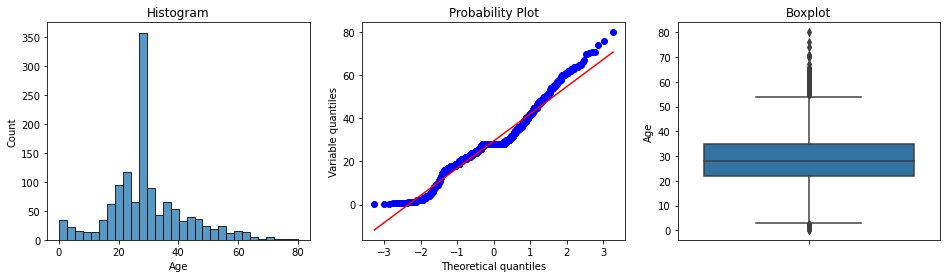

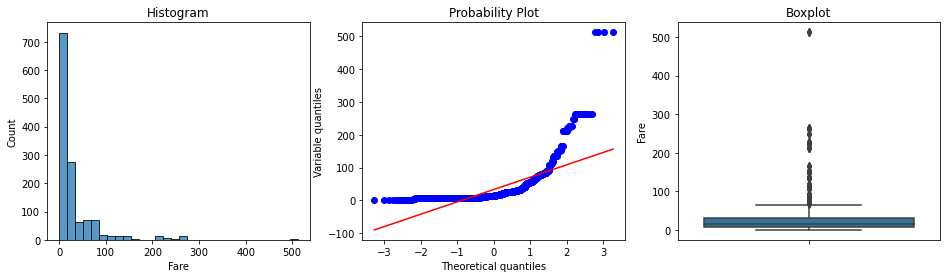

In [273]:
for feature in continuous_feature :

    diagnostic_plots(train2, feature)


# Outlier treatment

In [274]:
# create the capper

windsoriser = Winsorizer(capping_method='iqr', 
                          tail='both', 
                          fold=1.5,
                          variables= continuous_feature )

windsoriser.fit(train2)
train1 = windsoriser.transform(train2)

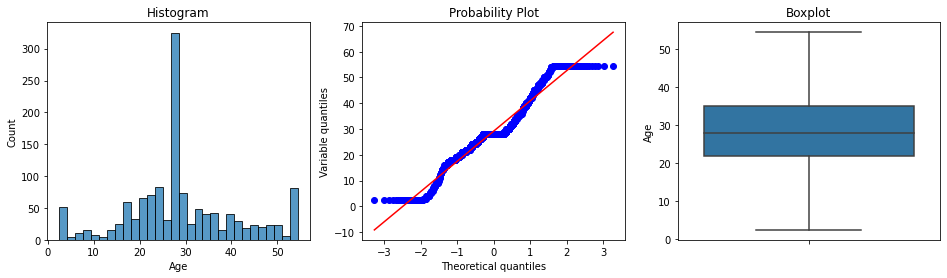

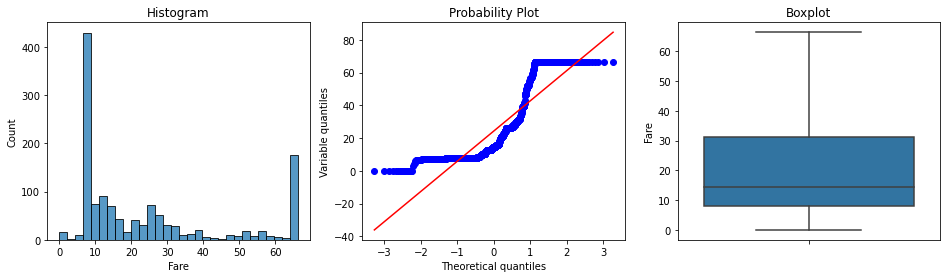

In [275]:
for feature in continuous_feature :

    diagnostic_plots(train1, feature)

In [276]:
categorical = [feature for feature in train1.columns if train1[feature].dtypes == 'O']
train1[categorical].head(10)

,Sex,Ticket,Cabin,Embarked
0,male,A/5 21171,C23 C25 C27,S
1,female,PC 17599,C85,C
2,female,STON/O2. 3101282,C23 C25 C27,S
3,female,113803,C123,S
4,male,373450,C23 C25 C27,S
5,male,330877,C23 C25 C27,Q
6,male,17463,E46,S
7,male,349909,C23 C25 C27,S
8,female,347742,C23 C25 C27,S
9,female,237736,C23 C25 C27,C


In [277]:
for feature in categorical:
    print(feature, train1[feature].nunique())

Sex 2
Ticket 929
Cabin 186
Embarked 3


In [278]:
train1.columns, test.columns

(Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
        'Embarked'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [279]:
from feature_engine.encoding import OneHotEncoder

encoder = OneHotEncoder(  variables=['Sex', 'Embarked'], drop_last= True)

encoder.fit(train1)
train2= encoder.transform(train1)

In [280]:
train2.head()

,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_S,Embarked_C
0,3.0,22.0,1.0,0.0,A/5 21171,7.2500,C23 C25 C27,1,1,0
1,1.0,38.0,1.0,0.0,PC 17599,66.3438,C85,0,0,1
2,3.0,26.0,0.0,0.0,STON/O2. 3101282,7.9250,C23 C25 C27,0,1,0
3,1.0,35.0,1.0,0.0,113803,53.1000,C123,0,1,0
4,3.0,35.0,0.0,0.0,373450,8.0500,C23 C25 C27,1,1,0


In [281]:
encoder = OrdinalEncoder(encoding_method='arbitrary', variables=['Cabin', 'Ticket'], errors = 'ignore')
encoder.fit(train2)

# transform the data
train4= encoder.transform(train2)

In [282]:
train4.head()

,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_S,Embarked_C
0,3.0,22.0,1.0,0.0,0,7.2500,0,1,1,0
1,1.0,38.0,1.0,0.0,1,66.3438,1,0,0,1
2,3.0,26.0,0.0,0.0,2,7.9250,0,0,1,0
3,1.0,35.0,1.0,0.0,3,53.1000,2,0,1,0
4,3.0,35.0,0.0,0.0,4,8.0500,0,1,1,0


In [283]:

train_new = train4[:train.shape[0]]
test_new = train4[train.shape[0]:]

In [284]:
train_new.shape, test_new.shape

((891, 10), (418, 10))

In [285]:
y = train['Survived']
y.shape

(891,)

In [286]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train_new, y,test_size=0.3,random_state=0, stratify= y)

In [287]:
X_train.shape, X_test.shape

((623, 10), (268, 10))

# RandomForestClassifier

In [288]:
clf_rf = RandomForestClassifier(n_estimators= 500, ccp_alpha= 0.0001, max_depth = 700, random_state = 1000)

clf_rf.fit(X=X_train, y=y_train)

y_pred_train = clf_rf.predict(X_train)
print("Train Accuracy:",accuracy_score(y_train,y_pred_train))

y_pred_test = clf_rf.predict(X_test)
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

Train Accuracy: 0.9983948635634029
Test Accuracy: 0.8507462686567164


In [289]:
test_prediction = clf_rf.predict(test_new)


# Submission File

In [293]:
my_submission = pd.DataFrame({'PassengerId': sample.PassengerId, 'Survived': test_prediction })
my_submission.to_csv('sample_submission_6.csv', index=False)

In [294]:
my_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


# Hyperparameter Tunning

In [187]:
from sklearn.model_selection import GridSearchCV
RF = RandomForestClassifier()


params = {    'max_depth': [300, 600, 700, 1500],
              'n_estimators': [2000, 1000, 400, 500, 600],
              'ccp_alpha' : [0.0001, 0.00001]
              }

In [188]:
clf_rf = GridSearchCV(estimator=RF,
                             param_grid=params,
                             scoring='accuracy',
                             cv= 10)

In [189]:
clf_rf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'ccp_alpha': [0.0001, 1e-05],
                         'max_depth': [300, 600, 700, 1500],
                         'n_estimators': [2000, 1000, 400, 500, 600]},
             scoring='accuracy')

In [190]:
clf_rf.best_params_ 

{'ccp_alpha': 0.0001, 'max_depth': 700, 'n_estimators': 1000}

In [196]:
y_pred_train=clf_rf.predict(X_train)
y_pred_test=clf_rf.predict(X_test)

In [197]:

print("Train Accuracy:",accuracy_score(y_train,y_pred_train))
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

Train Accuracy: 0.9983948635634029
Test Accuracy: 0.8395522388059702


# XGBClassifier

In [74]:
#from xgboost import XGBClassifier
import xgboost as xgb

XGB_model = xgb.XGBClassifier(n_estimators=200, gamma=0.6,learning_rate=0.4, reg_lambda = 0.8)
XGB_model.fit(X_train, y_train)

y_pred_train = XGB_model.predict(X_train)
y_pred_test = XGB_model.predict(X_test)

print("Train Accuracy:",accuracy_score(y_train,y_pred_train))
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

Train Accuracy: 0.9807383627608347
Test Accuracy: 0.832089552238806


# DecisionTreeClassifier

In [171]:
clf_dt = DecisionTreeClassifier(max_depth=4, ccp_alpha =0.0014163 )
clf_dt.fit(X_train, y_train)

y_pred_train = clf_dt.predict(X_train)
y_pred_test = clf_dt.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

Train Accuracy: 0.8475120385232745
Test Accuracy: 0.8134328358208955


# cost complexity pruning

In [172]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [173]:
ccp_alphas

array([0.        , 0.00053505, 0.00126737, 0.0014163 , 0.00144325,
       0.00179347, 0.00240301, 0.00383739, 0.00784913, 0.00910634,
       0.01418357, 0.01615797, 0.03725337, 0.13747788])

In [174]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 3 with ccp_alpha: 0.13747788320304977


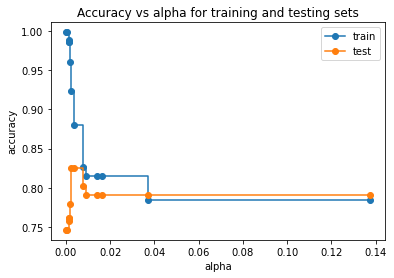

In [175]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

# LogisticRegression

In [76]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

trainpreds = model.predict(X_train)
testpreds = model.predict(X_test)


print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

Train Accuracy: 0.8475120385232745
Test Accuracy: 0.8134328358208955


C:\Users\pramod\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# BaggingClassifier

In [77]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=SVC(), n_estimators= 3000, random_state= 1000)
bagging_clf.fit(X_train, y_train)

trainpreds = bagging_clf.predict(X_train)
testpreds = bagging_clf.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

Train Accuracy: 0.8475120385232745
Test Accuracy: 0.8134328358208955


# SVC

In [198]:
from sklearn.svm import SVC
svc = SVC(C = 1000000)

svc.fit(X=X_train, y=y_train)

y_pred_train = svc.predict(X_train)
print("Train Accuracy:",accuracy_score(y_train,y_pred_train))

y_pred_test = clf_rf.predict(X_test)
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

Train Accuracy: 0.8780096308186196
Test Accuracy: 0.8395522388059702
